![cars.com image](https://graphics.cars.com/images/core/logo.png)

<div>
    <h2>About Cars.com :</h2>
<div style="background-color:#AB74CF;color:#FDF7FA;padding:10px;border:2px solid #2E294E;font-size:1.2em;border-radius:10px">Cars.com is a leading digital marketplace and solutions provider for the automotive industry that connects car shoppers with sellers. Launched in 1998 and headquartered in Chicago, the Company empowers shoppers with the data, resources and digital tools needed to make informed buying decisions and seamlessly connect with automotive retailers
</div>
<h2>Content :</h2>
<div style="background-color:#AB74CF;color:#FDF7FA;padding:10px;border:2px solid #2E294E;font-size:1.2em;border-radius:10px">
The following cars.com data include : 
    <ul>
    <li>The Model column provides information on the brand of car and the specific type as well as manufactured year.</li>
    <li>The Status column provides information on whether a car is brand new or secondhand (used)</li>
        <li>The Mileage column provides information on the distance covered by used cares in miles</li>
    <li>The price column contains information on the rate at which a care is being offered for sale</li>
    <li>The MSRP (Manufacturer Suggested Retail Price) column provide information on the price the car makers are suggesting a car should be retailed.</li>
        <li>The year column indicates the year a car was manufactured</li>
    </ul>
</div>
<h2> Table of contents : </h2>
<div style="background-color:#AB74CF;color:#FDF7FA;padding:10px;border:2px solid #2E294E;font-size:1.2em;border-radius:10px">
1.Data exploring<br>
2.Data cleaning<br>
3.Data visualization<br>
</div>

<div style="background-color:#AB74CF;color:#FFFFFB;padding:10px;border:2px solid #2E294E;font-size:1.2em;border-radius:10px">
1.Data exploring<br>
</div>

In [1]:
#Importing libraires :
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import missingno as msno
#Styling : 
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [20, 7] 
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#Getting data :
df = pd.read_csv("/kaggle/input/used-and-new-cars-datasets/car_data.csv")

In [3]:
#Take a look on data :
df.head()

,Unnamed: 0,Model,Year,Status,Mileage,Price,MSRP
0,0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop


In [4]:
#Checking the shape of data and columns : 
print("Shape of data : ",df.shape)
print(df.info())
### As you can see we need to apply so modification on Dtype for (year,Mileage,Price,MSRP)

Shape of data :  (115762, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115762 entries, 0 to 115761
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  115762 non-null  int64 
 1   Model       115762 non-null  object
 2   Year        115762 non-null  int64 
 3   Status      115762 non-null  object
 4   Mileage     115762 non-null  object
 5   Price       115762 non-null  object
 6   MSRP        115762 non-null  object
dtypes: int64(2), object(5)
memory usage: 6.2+ MB
None


<AxesSubplot:>

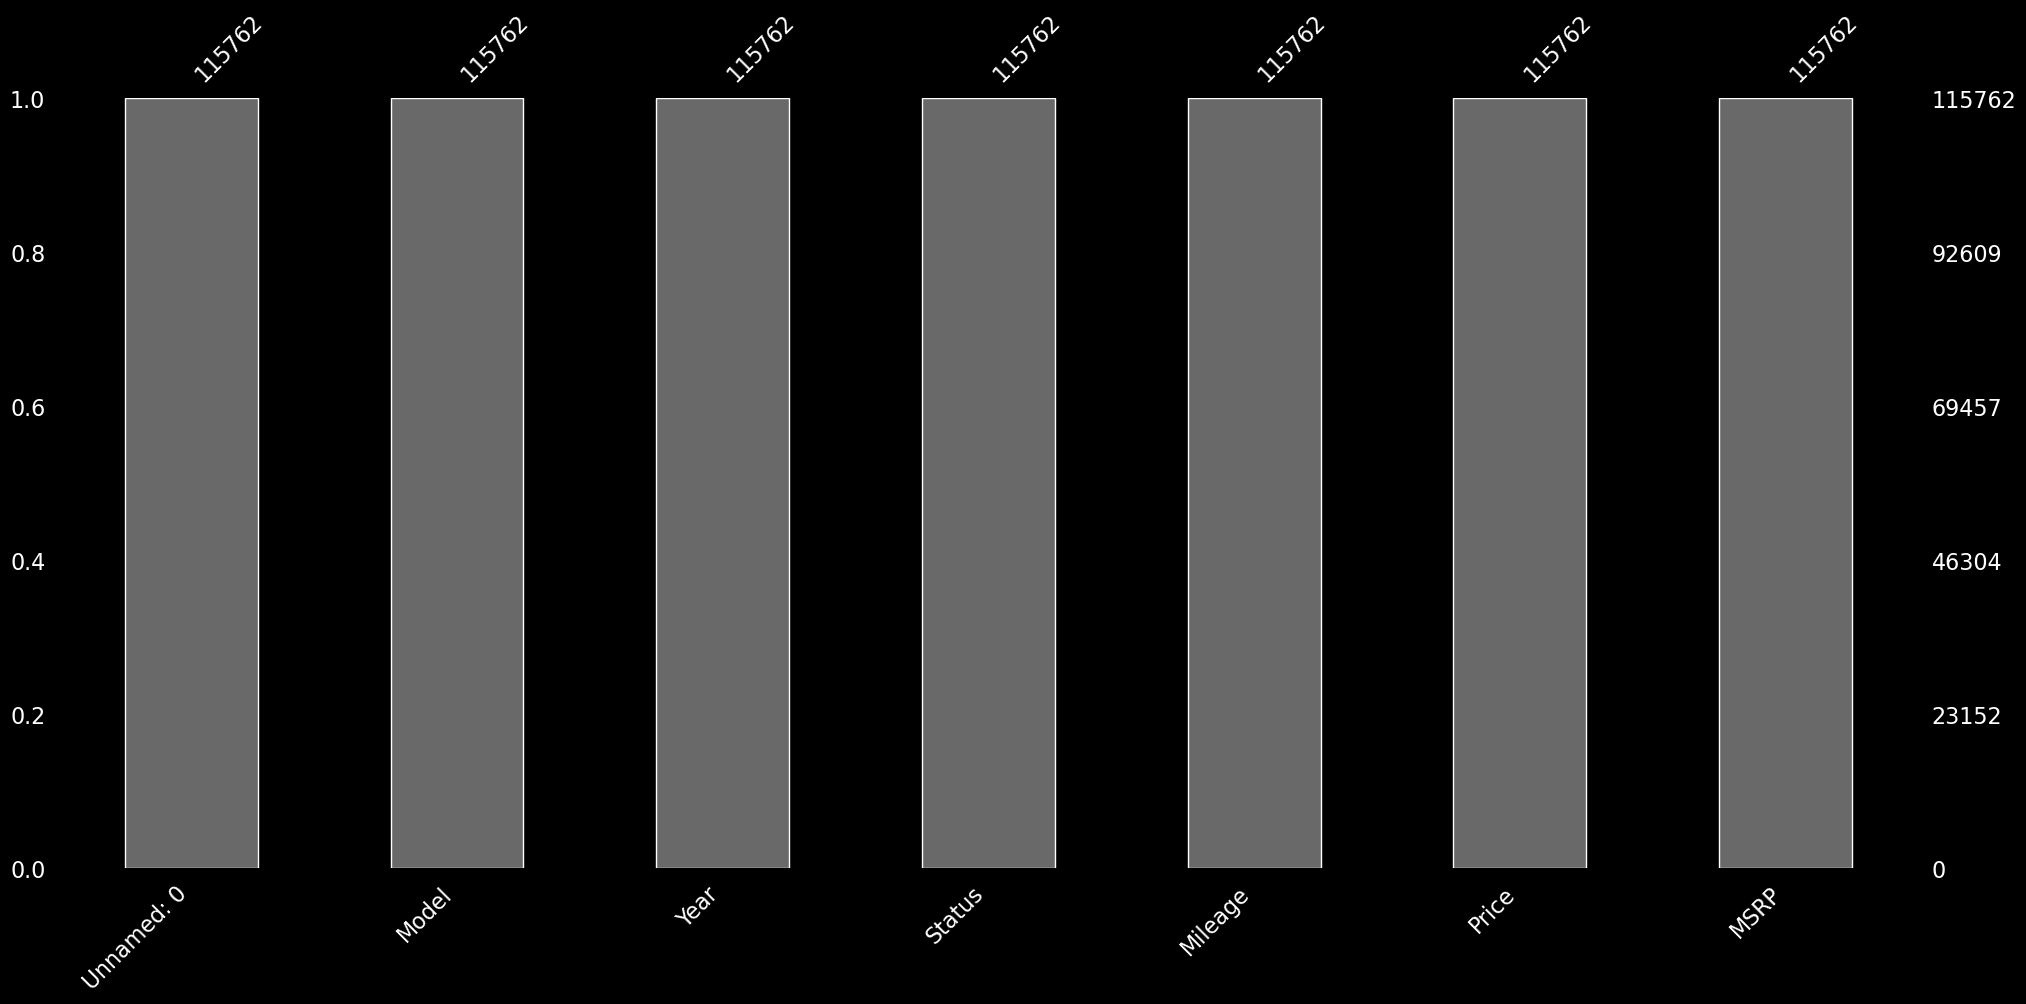

In [5]:
#Checking if we have any null values
msno.bar(df)
##For a first look we can see that we dont have any missing values, but is it true ?

<div style="background-color:#AB74CF;color:#FFFFFB;padding:10px;border:2px solid #2E294E;font-size:1.2em;border-radius:10px">
2.Data cleaning<br>
</div>

In [6]:
#Lets create a copy for dataframe before making any change :
df_copy = df.copy()

In [7]:
#Dropping useless columns
df_copy = df_copy.drop('Unnamed: 0', axis=1)

In [8]:
#we have any null values for Mileage: 
df_copy["Mileage"].value_counts()
###As we can see that most of them are Not Available, maybe its a new car ?

Not available    47868
310 mi.            101
23,000 mi.          19
1,000 mi.           18
35,000 mi.          17
                 ...  
25,796 mi.           1
51,830 mi.           1
34,991 mi.           1
62,460 mi.           1
125,757 mi.          1
Name: Mileage, Length: 49282, dtype: int64

In [9]:
#As we can see car who are not available are new cars :
df_copy[df_copy["Mileage"]=="Not available"]["Status"]

0         New
1         New
2         New
3         New
5         New
         ... 
115753    New
115756    New
115757    New
115758    New
115760    New
Name: Status, Length: 47868, dtype: object

In [10]:
#We can replace Not available by 0 mi.
df_copy["Mileage"].replace("Not available","0 mi.",inplace=True)

In [11]:
#Replacing the Mileage to int type : 
def mileage_int_convert(mileage):
  #We get m as ["25,796","mi."] for exemple than take first index
  m = mileage.split(" ")[0]
  #We need to remove , to get int number
  m = int("".join(m.split(",")))
  return m
df_copy["Mileage"] = df_copy["Mileage"].apply(mileage_int_convert)
#We can see that Mileage is in int now

In [12]:
#we need to check have any null values for Price: 
df_copy["Price"].value_counts()
#We can also see that we have Not priced car

Not Priced    652
$29,995       241
$34,995       226
$72,010       200
$39,995       192
             ... 
$82,824         1
$25,930         1
$62,949         1
$73,845         1
$47,346         1
Name: Price, Length: 37652, dtype: int64

In [13]:
#we need to check have any null values for MSRP: 
df_copy["MSRP"].value_counts()
#We can also see that we have Not specified MSRP for cars

Not specified        72097
$1,000 price drop     3046
$500 price drop       1882
$2,000 price drop     1155
$100 price drop        540
                     ...  
MSRP $58,549             1
MSRP $72,920             1
MSRP $83,630             1
MSRP $50,285             1
MSRP $40,761             1
Name: MSRP, Length: 12977, dtype: int64

In [14]:
#We can see that we have 553 car with Not price or MSRP
number_cars_noprice_nomsrp = len(df_copy[(df_copy["Price"] == "Not Priced") & (df_copy["MSRP"] == "Not specified")])
print("Number of cars with no price or MSRP :",number_cars_noprice_nomsrp)

Number of cars with no price or MSRP : 553


In [15]:
#Comparing the price and MSRP 
df[(df["Price"] == "Not Priced") & (df["MSRP"] != "Not specified")][["Price","MSRP"]]

,Price,MSRP
17253,Not Priced,"MSRP $69,820"
19347,Not Priced,"MSRP $83,290"
19616,Not Priced,"MSRP $29,795"
20176,Not Priced,"MSRP $29,795"
20264,Not Priced,"MSRP $29,795"
...,...,...
107546,Not Priced,"MSRP $52,975"
108562,Not Priced,"MSRP $40,148"
109224,Not Priced,"MSRP $43,195"
112677,Not Priced,"MSRP $31,347"


In [16]:
print(f"Percentage of cars with no price or MSRP compared to all cars :{number_cars_noprice_nomsrp / df.shape[0] * 100}%")

Percentage of cars with no price or MSRP compared to all cars :0.47770425528238974%


In [17]:
#Need to convert Price and MSRP to int 
df_copy[["Price","MSRP"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115762 entries, 0 to 115761
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Price   115762 non-null  object
 1   MSRP    115762 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [18]:
#replace Not priced and not_specified in MSRP :
df_copy["MSRP"].replace("Not specified","MSRP $0",inplace=True)
df_copy["Price"].replace("Not Priced","$0",inplace=True)

In [19]:
#Converting the price : 
def price_convert(price):
  #We get m as ["","25,796"] for exemple than take second index
  p = price.split("$")[1]
  p = int("".join(p.split(",")))
  return p
df_copy["Price"] = df_copy["Price"].apply(price_convert)

In [20]:
#Converting the MSRP as we can see we Price Drop : 
def msrp_convert(msrp,price):
  if("MSRP" in msrp.split(" ")):
    #We get msrp as ["MSRP ","25,796"] for exemple than take second index
    msrp = msrp.split("$")[1]
    msrp = int("".join(msrp.split(",")))
    if(msrp == 0):
      msrp = price
  else:
    drop = msrp.split(" ")[0]
    drop = drop.split("$")[1]
    drop = int("".join(drop.split(",")))
    msrp = price - drop
  #If we dont have any price :
  if(msrp <= 0):
    return np.nan
  return msrp
df_copy["MSRP"] = df_copy[["MSRP","Price"]].apply(lambda x: msrp_convert(x["MSRP"], x["Price"]), axis=1)

In [21]:
#Check how many cars with no price : 
len(df_copy[df_copy["Price"] == 0])

652

In [22]:
#Dropping cars with no price : 
df_copy["Price"].replace(0,np.nan,inplace=True)

In [23]:
#Droping any null values
df_copy.dropna(inplace=True)

In [24]:
#Replacing null Price values with the MSRP
price_null = df_copy[df_copy["Price"] == 0]
df_copy[df_copy["Price"] == 0]["Price"] = price_null["MSRP"]

In [25]:
#Can we extract the car brand from the model ?
df_copy["Model"].value_counts()
#We notice that the we can extract the Model and the brand for exemple : "Mercedes-Benz" is brand and "S-class" is model

2023 Mercedes-Benz S-Class S 580 4MATIC       916
2023 Mercedes-Benz S-Class S 500 4MATIC       800
2023 Mercedes-Benz GLE 450 AWD 4MATIC         700
2018 Tesla Model 3 Long Range                 546
2023 Mercedes-Benz GLS 450 4MATIC             500
                                             ... 
2014 Chevrolet Camaro 2LS                       1
2004 Chevrolet Monte Carlo SS Supercharged      1
2012 Chevrolet Equinox LS                       1
2015 Chevrolet Camaro 2SS                       1
2011 Volkswagen Tiguan SE                       1
Name: Model, Length: 9205, dtype: int64

In [26]:
#Creating a function to extract the brand from the model
def extract_brand(model):
  #we split the model for exemple : ["2023","Mercedes-Benz","S-Class","S","580","4MATIC"]
  m = model.split(" ")
  brand = m[1] ## we take the brand 
  return brand
df_copy["Brand"] = df_copy["Model"].apply(extract_brand)

In [27]:
#we can then get rid of the year and brand from the model 
def extract_model(model):
  m = model.split(" ")
  return " ".join(m[2:4])
df_copy["Model"] = df_copy["Model"].apply(extract_model)

In [28]:
#Droping duplicates values
df_copy = df_copy.drop_duplicates()

In [29]:
#Checking our dataframe again :
df_copy.head()

,Model,Year,Status,Mileage,Price,MSRP,Brand
0,TLX A-Spec,2022,New,0,49445.0,49445.0,Acura
1,RDX A-Spec,2023,New,0,50895.0,50895.0,Acura
2,TLX Type,2023,New,0,57745.0,57745.0,Acura
3,TLX Type,2023,New,0,57545.0,57545.0,Acura
4,MDX Sport,2019,Used,32675,40990.0,40390.0,Acura


In [30]:
#As we can see that we have many possible values for Status so we are going divide it to 3 classes
## ["Used","New","Certified"]
df_copy["Status"].value_counts()

Used                    60772
New                     29000
Porsche Certified        1904
Acura Certified          1052
INFINITI Certified        861
Volkswagen Certified      795
BMW Certified             568
Dodge Certified           381
Chevrolet Certified       206
Toyota Certified          183
Ford Certified             29
Name: Status, dtype: int64

In [31]:
def change_status(status):
  if("Certified" in status):
    return "Certified"
  return status
df_copy["Status"] = df_copy["Status"].apply(change_status)

In [32]:
#As we can see there is nothing much to do about Year
df_copy["Year"].value_counts()

2023    20999
2022    15930
2020     9959
2019     9623
2021     9338
        ...  
1958        2
1962        2
1953        1
1949        1
1966        1
Name: Year, Length: 70, dtype: int64

In [33]:
#We can say know that we finished data cleaning just going to reorder columns.
new_cols = ["Brand","Model","Year","Status","Mileage","MSRP","Price"]
df_copy = df_copy.reindex(columns = new_cols)

In [34]:
#Checking the cleaned dataset
df_copy.head()

,Brand,Model,Year,Status,Mileage,MSRP,Price
0,Acura,TLX A-Spec,2022,New,0,49445.0,49445.0
1,Acura,RDX A-Spec,2023,New,0,50895.0,50895.0
2,Acura,TLX Type,2023,New,0,57745.0,57745.0
3,Acura,TLX Type,2023,New,0,57545.0,57545.0
4,Acura,MDX Sport,2019,Used,32675,40390.0,40990.0


<div style="background-color:#AB74CF;color:#FFFFFB;padding:10px;border:2px solid #2E294E;font-size:1.2em;border-radius:10px">
3.Data visualization<br>
</div>

In [35]:
#Plot chart on the Brands :
bd = df_copy["Brand"].value_counts()
fig = px.bar(
    x = bd.index,
    y = bd.values,
    color = bd.index,
    color_discrete_sequence = px.colors.sequential.PuBuGn,
    text = bd.values,
    title = "Top cars brands",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "cars brands",
    yaxis_title = "count",
    font = dict(size=17,family="Franklin Gothic")
)


In [36]:
#Pie chart on Brands  : 
bd = df_copy["Brand"].value_counts()
fig = px.pie(
    values = bd.values,
    names = bd.index,
    color_discrete_sequence=px.colors.sequential.PuBu,
    title= 'Cars brands distribution',template='plotly_dark'
)
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))
fig.show()

In [37]:
#Plot chart on average price by brands
group_by_brand = df_copy.groupby(by="Brand").mean().reset_index()
brand = group_by_brand["Brand"]
price = group_by_brand["Price"].astype(int)
fig = px.bar(
    x = brand,
    y = price,
    color = price,
    color_discrete_sequence = px.colors.sequential.PuBuGn,
    text = price,
    title = "Average cars price by brand",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "brand",
    yaxis_title = "price",
    font = dict(size=17,family="Franklin Gothic")
)

In [38]:
#Plot chart on Mileage by brands
group_by_brand = df_copy.groupby(by="Brand").mean().reset_index()
brand = group_by_brand["Brand"]
mileage = group_by_brand["Mileage"].astype(int)
fig = px.bar(
    x = brand,
    y = mileage,
    color = mileage,
    color_discrete_sequence = px.colors.sequential.PuBuGn,
    text = mileage,
    title = "Average cars Mileage by brand",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "brand",
    yaxis_title = "mileage",
    font = dict(size=17,family="Franklin Gothic")
)

In [39]:
#Average cars brand saled by year :
group_by_brand = df_copy.groupby(by="Brand").mean().reset_index()
brand = group_by_brand["Brand"]
year = group_by_brand["Year"].astype(int)
fig = px.bar(
    y = brand,
    x = year,
    color = year,
    color_discrete_sequence = px.colors.sequential.PuBuGn,
    text = year,
    title = "Average cars year by brand",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "year",
    yaxis_title = "brand",
    xaxis=dict(range=[min(year)-1,max(year)+1]),
    font = dict(size=17,family="Franklin Gothic")
)

In [40]:
#Top 10 cars Model sold
md = df_copy["Model"].value_counts()[:11]
fig = px.bar(
    x = md.index,
    y = md.values,
    color = md.index,
    color_discrete_sequence = px.colors.sequential.PuBuGn,
    text = md.values,
    title = "Top 10 cars models sold",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "cars Models",
    yaxis_title = "count",
    font = dict(size=17,family="Franklin Gothic")
)

In [41]:
#Pie chart on Status  : 
st = df_copy["Status"].value_counts()
fig = px.pie(
    values = st.values,
    names = st.index,
    color = st.values,
    color_discrete_sequence=px.colors.sequential.PuBu,
    title= 'Status distribution',template='plotly_dark'
)
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))
fig.show()

In [42]:
#Barplot on status with price
gp_st = df_copy.groupby("Status").mean().reset_index()
status = gp_st["Status"]
price = gp_st["Price"].astype(int)
fig = px.bar(
    x = status,
    y = price,
    color = price,
    color_discrete_sequence = px.colors.sequential.Purples,
    text = price,
    title = "Barplot on the status with price",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "Status",
    yaxis_title = "Price",
    font = dict(size=17,family="Franklin Gothic")
)

In [43]:
#Scatter plot in Price with MSRP
df_sorted = df_copy.sort_values(by="Price")[:-100]
price = df_sorted["Price"]
msrp = df_sorted["MSRP"]
brand = df_sorted["Brand"]
fig = px.scatter(
    x = price,
    y = msrp,
    color = brand,
    color_discrete_sequence = px.colors.sequential.Agsunset,
    title = "Scatter plot on MSRP and Price",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "Price",
    yaxis_title = "MSRP",

    font = dict(size=17,family="Franklin Gothic")
)

<div style="background-color:#AB74CF;color:#FFFFFB;padding:10px;border:2px solid #2E294E;font-size:1.2em;border-radius:10px">
    <center><h2>Thanks for watching ! <strong>Dont forget to upvote!!</strong> <br></h2></center>
</div>